Working with the med3pa Comparaison module
------------------------------------------

The below function will help plotting the global metrics calculated for two compared experiments.


In [20]:
import json
import matplotlib.pyplot as plt

def plot_global_metrics(file_path, metric):
    
    with open(file_path, 'r') as f1:
        data = json.load(f1)

    # Initialize lists to hold values for plotting
    dr_values = []
    metrics_dr_1_values = []
    metrics_dr_2_values = []

    # Extract values from the JSON data
    for dr in sorted(data.keys(), key=int, reverse=True):
        dr_values.append(int(dr))
        metrics_dr_1_values.append(data[dr]['metrics_dr_1']['metrics'][metric])
        metrics_dr_2_values.append(data[dr]['metrics_dr_2']['metrics'][metric])

    # Ensure DR values go from 100 to 0
    dr_values = sorted(dr_values, reverse=True)

    # Plot the metrics
    plt.figure(figsize=(10, 6))
    plt.plot(dr_values, metrics_dr_1_values, label='metrics_dr_1', marker='o')
    plt.plot(dr_values, metrics_dr_2_values, label='metrics_dr_2', marker='x')

    # Add labels and title
    plt.xlabel('DR (descending from 100 to 0)')
    plt.ylabel(metric)
    plt.title(f'Comparison of {metric} for metrics_dr_1 and metrics_dr_2')
    plt.legend()
    plt.grid(True)
    plt.gca().invert_xaxis()  # Invert the x-axis to ensure DR goes from 100 to 0
    plt.show()

We use this function and pass the path to the global_metrics_comparaison.json file, alongside the metric we want to plot

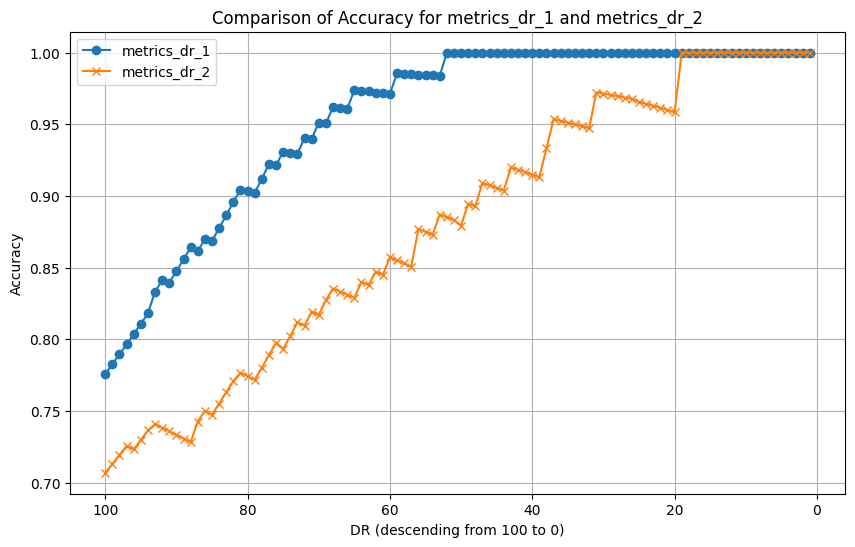

In [21]:

plot_global_metrics('./med3pa_comparaison_results/global_metrics_comparaison.json', 'Accuracy')

The below function will plot the metrics for each profile in the tree, give the two experiments had the same tree structure.

In [23]:
import json
import matplotlib.pyplot as plt

def plot_profile_metrics(file_path, samples_ratio, profile, metric):
    
    with open(file_path, 'r') as f1:
        data = json.load(f1)
        
    # Initialize lists to hold values for plotting
    dr_values = []
    metrics_1_values = []
    metrics_2_values = []

    # Extract values from the JSON data
    for dr in sorted(data[samples_ratio][profile].keys(), key=int, reverse=True):
        dr_value = int(dr)
        metric_1_value = data[samples_ratio][profile][dr].get('metrics_1', {}).get(metric)
        metric_2_value = data[samples_ratio][profile][dr].get('metrics_2', {}).get(metric)
        
        if metric_1_value is not None:
            dr_values.append(dr_value)
            metrics_1_values.append(metric_1_value)
        if metric_2_value is not None:
            if dr_value not in dr_values:
                dr_values.append(dr_value)
            metrics_2_values.append(metric_2_value)

    # Ensure DR values go from 100 to 0
    dr_values = sorted(dr_values, reverse=True)

    # Plot the metrics
    plt.figure(figsize=(10, 6))
    if metrics_1_values:
        plt.plot(dr_values[:len(metrics_1_values)], metrics_1_values, label='metrics_1', marker='o')
    if metrics_2_values:
        plt.plot(dr_values[:len(metrics_2_values)], metrics_2_values, label='metrics_2', marker='x')

    # Add labels and title
    plt.xlabel('DR (descending from 100 to 0)')
    plt.ylabel(metric)
    plt.title(f'Comparison of {metric} for metrics_1 and metrics_2 (samples_ratio: {samples_ratio}, profile: {profile})')
    plt.legend()
    plt.grid(True)
    plt.gca().invert_xaxis()  # Invert the x-axis to ensure DR goes from 100 to 0
    plt.show()


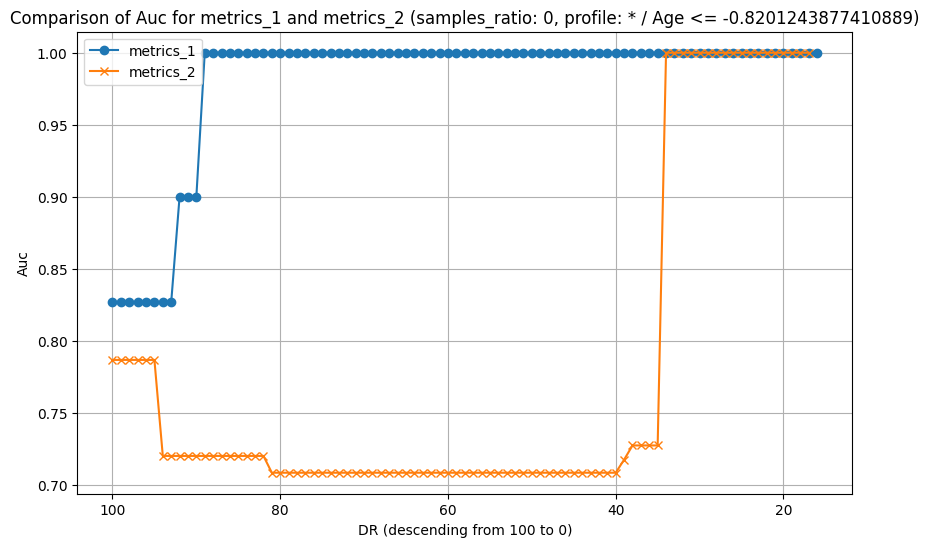

In [26]:
file_path = './med3pa_comparaison_results/profiles_metrics_comparaison.json'
profile = "* / Age <= -0.8201243877410889"

plot_profile_metrics(file_path, "0", profile, 'Auc')